In [7]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

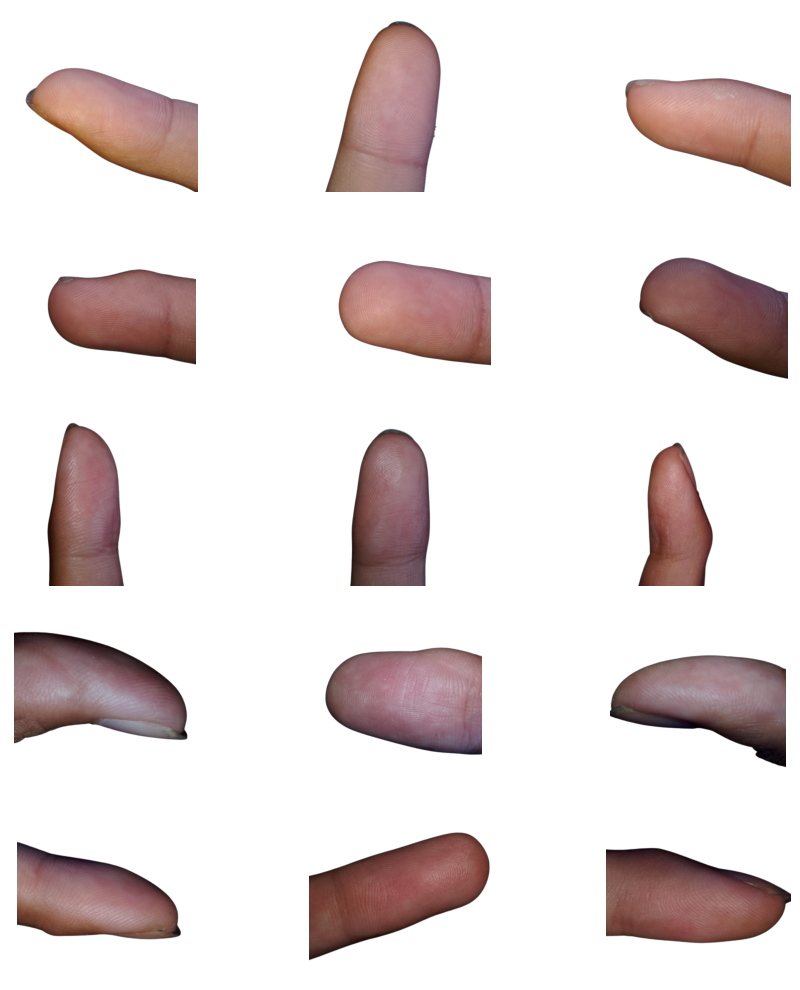

In [8]:
# Daftar nama folder yang berisi file gambar
folder_names = ['sidikjari/jari1', 'sidikjari/jari2', 'sidikjari/jari3','sidikjari/jari4', 'sidikjari/jari5' ]  # Tambahkan folder lain sesuai kebutuhan

# Mengumpulkan semua file gambar dari setiap folder
image_files = []
for folder_name in folder_names:
    image_files.extend([os.path.join(folder_name, f) for f in os.listdir(folder_name) if os.path.isfile(os.path.join(folder_name, f))])

# Menghitung jumlah gambar
num_images = len(image_files)

# Menentukan ukuran grid untuk menampilkan gambar (misalnya, 3x3 grid)
grid_size = (5, 3)

# Membuat subplots
fig, axes = plt.subplots(*grid_size, figsize=(10, 10))

# Menampilkan setiap gambar pada subplot yang sesuai
for idx, image_path in enumerate(image_files):
    if idx >= grid_size[0] * grid_size[1]:
        break  # Jika gambar lebih banyak dari grid, hentikan penambahan gambar
    
    img = mpimg.imread(image_path)
    
    # Menentukan posisi subplot
    ax = axes[idx // grid_size[1], idx % grid_size[1]]
    ax.imshow(img)
    ax.axis('off')  # Menghilangkan sumbu

# Menghilangkan subplot yang kosong jika jumlah gambar kurang dari grid
for idx in range(num_images, grid_size[0] * grid_size[1]):
    fig.delaxes(axes.flatten()[idx])

# Menampilkan gambar gabungan
plt.tight_layout()
plt.show()

In [16]:
# Fungsi untuk mengonversi citra ke grayscale menggunakan rumus (R + G + B) / 3
def image_to_grayscale(image):
    if image.mode != "RGB":
        image = image.convert("RGB")
    
    width, height = image.size
    grayscale_array = np.zeros((height, width), dtype=np.uint8)
    
    pixels = image.load()
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i,j]
            grayscale_value = int((r + g + b) / 3)
            grayscale_array[j,i] = grayscale_value
    
    grayscale_image = Image.fromarray(grayscale_array, mode='L')
    return grayscale_image

In [17]:
# Fungsi untuk melakukan segmentasi dengan metode Global Threshold
def global_threshold(image, threshold):
    # Pastikan citra dalam format grayscale
    if image.mode != 'L':
        image = convert_to_grayscale(image)

    # Konversi citra grayscale menjadi numpy array
    grayscale_array = np.array(image)

    # Terapkan threshold untuk segmentasi
    binary_array = np.where(grayscale_array > threshold, 255, 0).astype(np.uint8)

    # Konversi array numpy menjadi citra mode 'L'
    binary_image = Image.fromarray(binary_array, mode='L')

    return binary_image

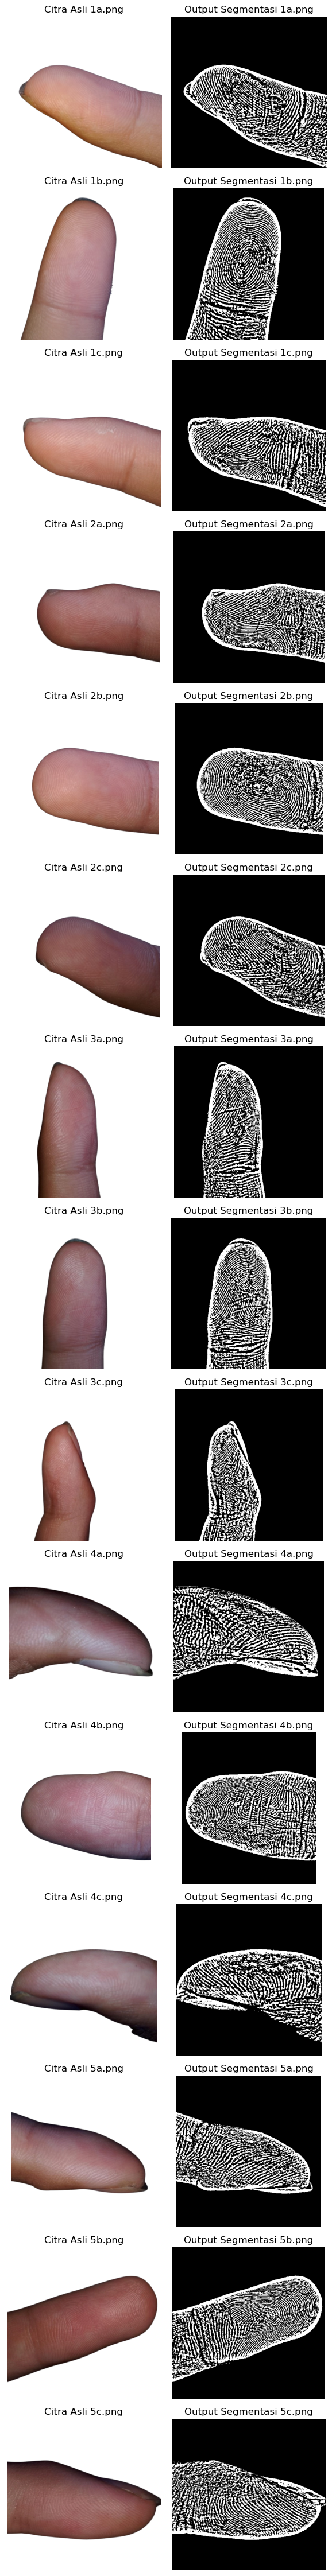

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def convert_to_grayscale(image):
    return image.convert('L')

def adaptive_threshold_mean(grayscale_image, block_size):
    img_array = np.array(grayscale_image)
    if block_size % 2 == 0:
        block_size += 1
    mean_filtered = cv2.blur(img_array, (block_size, block_size))
    thresholded = img_array > mean_filtered
    return Image.fromarray(thresholded.astype(np.uint8) * 255)

def main_segmentasi():
    folder_names = ['sidikjari/jari1', 'sidikjari/jari2', 'sidikjari/jari3', 'sidikjari/jari4', 'sidikjari/jari5']
    block_size = 15

    # Hitung total jumlah citra
    total_images = sum(len(files) for _, _, files in os.walk('sidikjari') if files)

    # Tentukan ukuran grid subplot
    cols = 2
    rows = total_images

    fig, axs = plt.subplots(rows, cols, figsize=(6, 3 * rows))

    row_index = 0
    for folder in folder_names:
        for filename in os.listdir(folder):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(folder, filename)
                image = Image.open(image_path)

                grayscale_image = convert_to_grayscale(image)
                segmented_image2 = adaptive_threshold_mean(grayscale_image, block_size)

                axs[row_index, 0].imshow(image)
                axs[row_index, 0].set_title(f'Citra Asli {filename}')
                axs[row_index, 0].axis('off')

                axs[row_index, 1].imshow(segmented_image2, cmap='gray')
                axs[row_index, 1].set_title(f'Output Segmentasi {filename}')
                axs[row_index, 1].axis('off')

                row_index += 1

    plt.tight_layout()
    plt.show()

main_segmentasi()


In [14]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

def convert_to_grayscale(image):
    return image.convert('L')

def adaptive_threshold_mean(grayscale_image, block_size):
    img_array = np.array(grayscale_image)
    if block_size % 2 == 0:
        block_size += 1
    mean_filtered = cv2.blur(img_array, (block_size, block_size))
    thresholded = img_array > mean_filtered
    return Image.fromarray(thresholded.astype(np.uint8) * 255)

def main_segmentasi():
    folder_names = ['sidikjari/jari1', 'sidikjari/jari2', 'sidikjari/jari3', 'sidikjari/jari4', 'sidikjari/jari5']
    block_size = 15
    output_folder = 'hasil segmentasi'

    # Buat folder output jika belum ada
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    row_index = 0
    for folder in folder_names:
        for filename in os.listdir(folder):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                image_path = os.path.join(folder, filename)
                image = Image.open(image_path)

                grayscale_image = convert_to_grayscale(image)
                segmented_image2 = adaptive_threshold_mean(grayscale_image, block_size)

                # Simpan gambar asli
                original_image_path = os.path.join(output_folder, f'asli_{filename}')
                image.save(original_image_path)

                # Simpan hasil segmentasi
                segmented_image_path = os.path.join(output_folder, f'segmentasi_{filename}')
                segmented_image2.save(segmented_image_path)

                row_index += 1

    print(f'Hasil segmentasi telah disimpan di folder: {output_folder}')

main_segmentasi()

Hasil segmentasi telah disimpan di folder: hasil segmentasi


Folder: hasil segmentasi


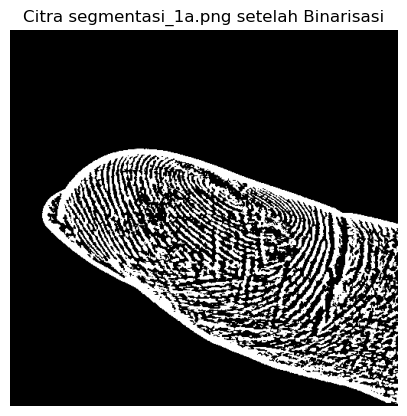

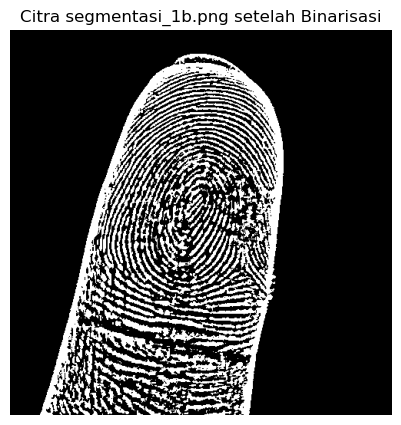

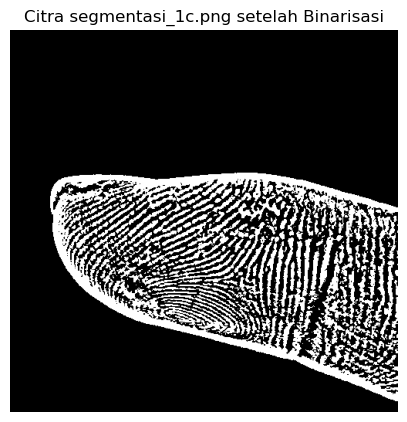

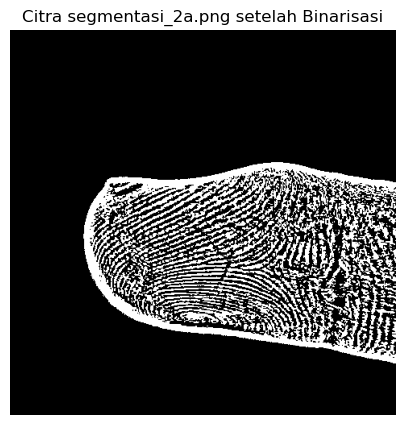

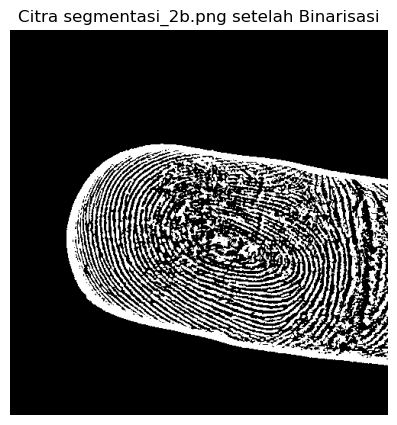

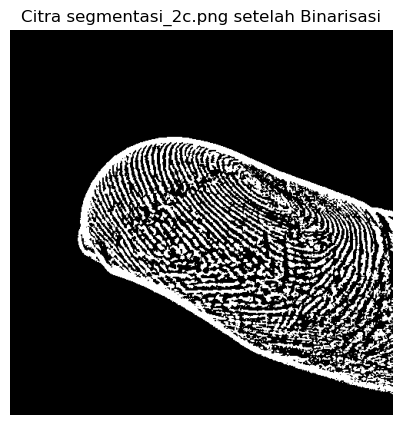

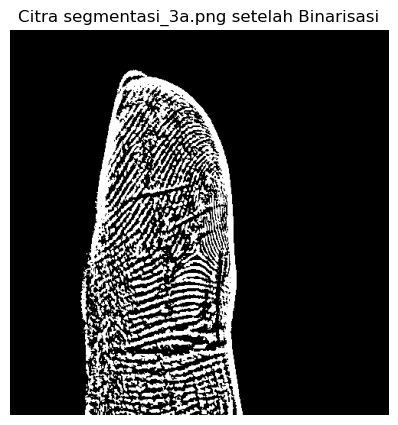

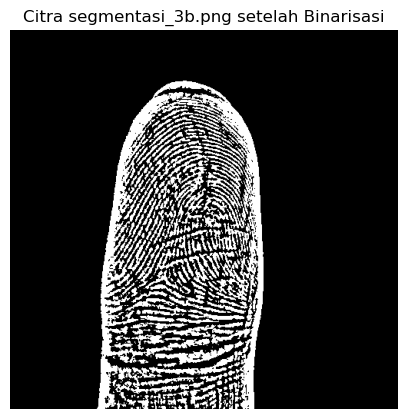

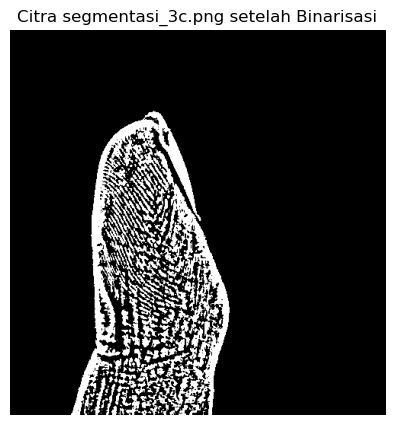

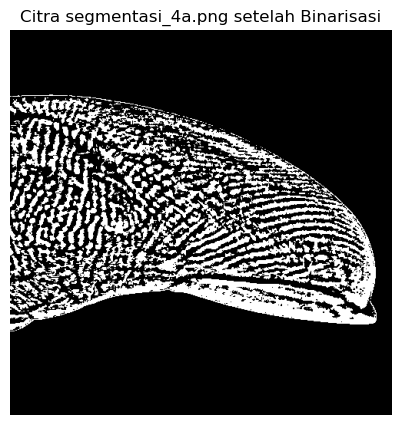

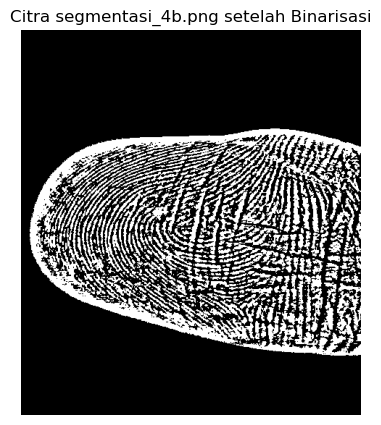

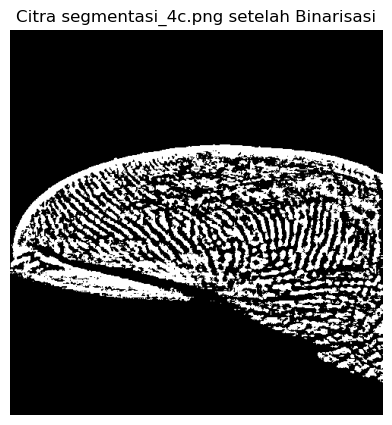

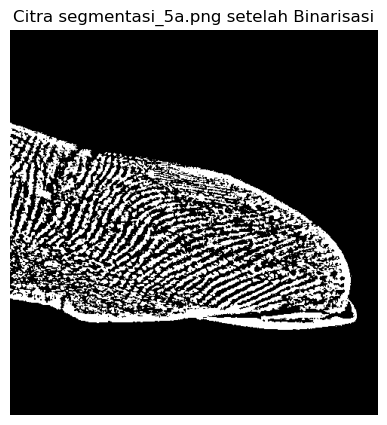

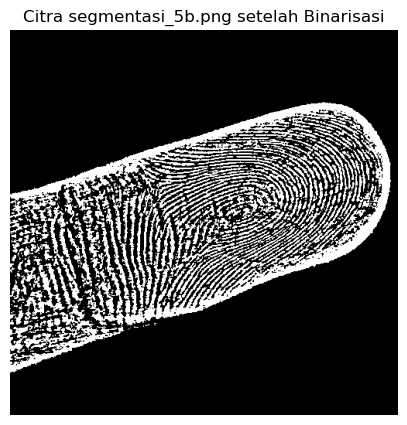

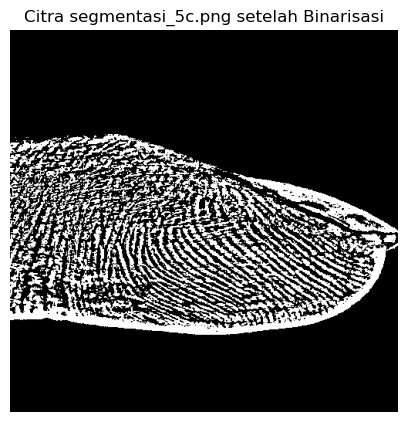

In [18]:
import cv2
import matplotlib.pyplot as plt
import os

# Fungsi untuk menampilkan citra
def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

# Daftar folder dengan citra sidik jari
folder_names = ['hasil segmentasi']

# Loop melalui setiap folder
for folder in folder_names:
    print(f"Folder: {folder}")
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Binarisasi citra
            _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

            # Menampilkan citra biner
            show_image(f"Citra {filename} setelah Binarisasi", binary_image)


Folder: hasil segmentasi


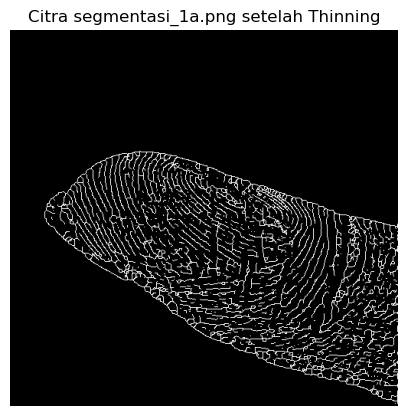

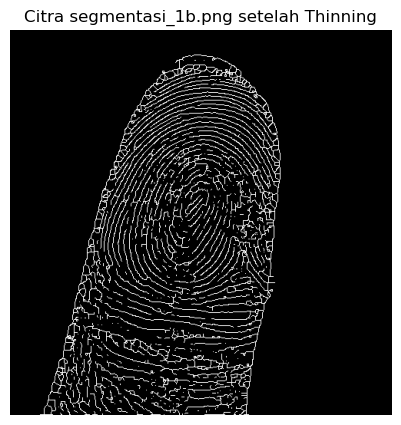

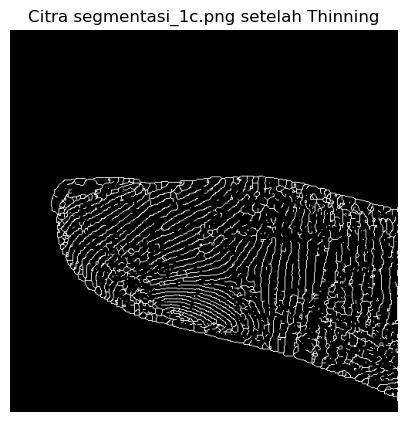

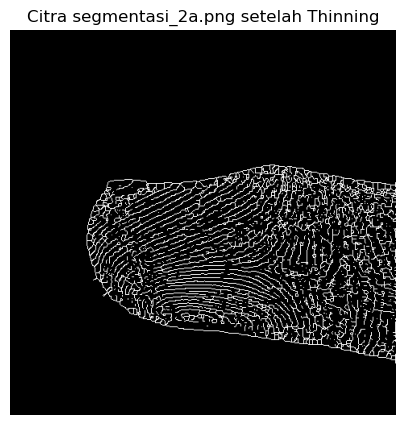

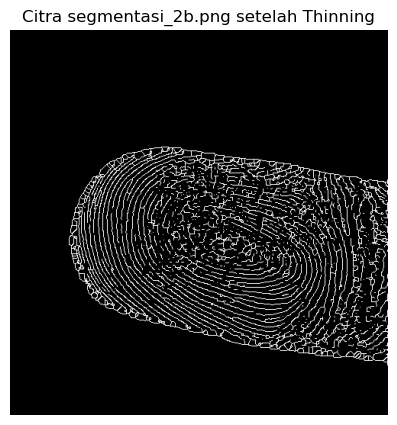

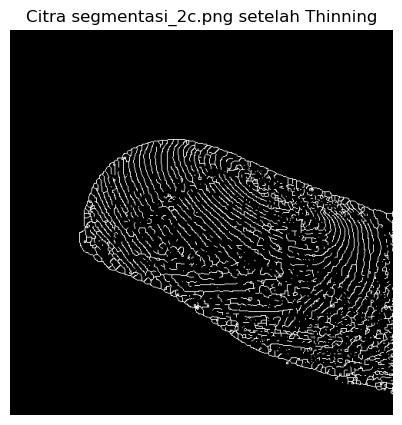

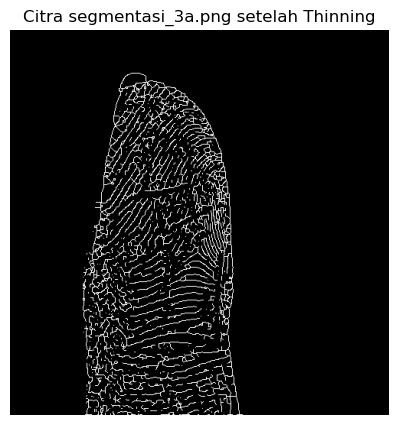

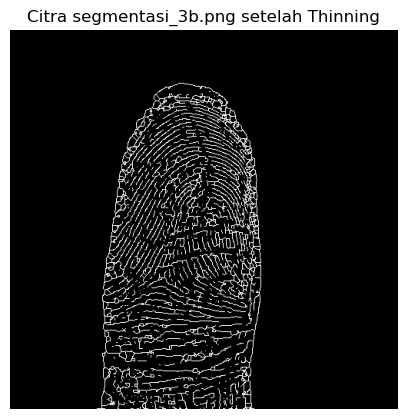

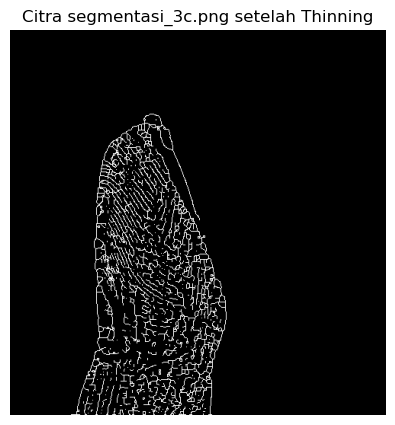

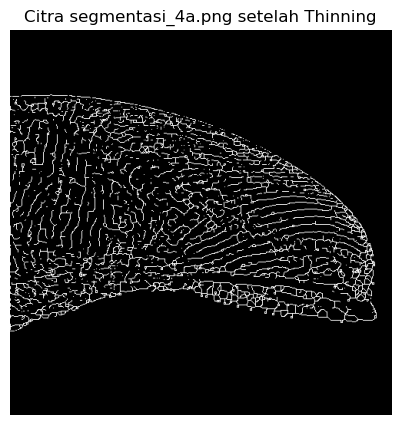

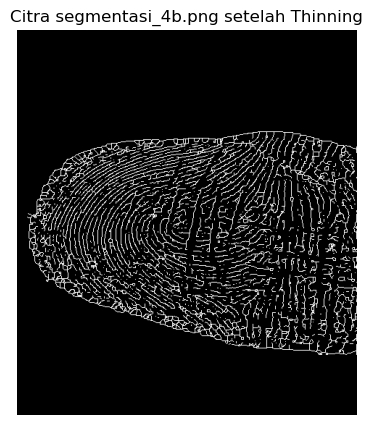

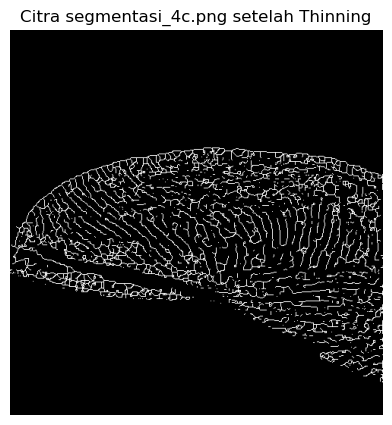

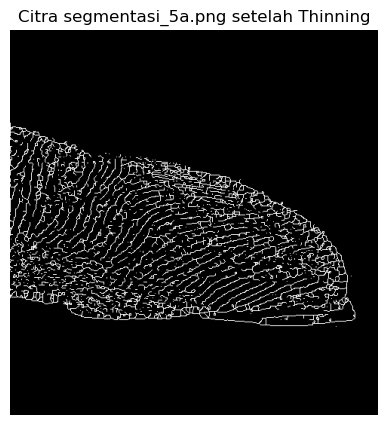

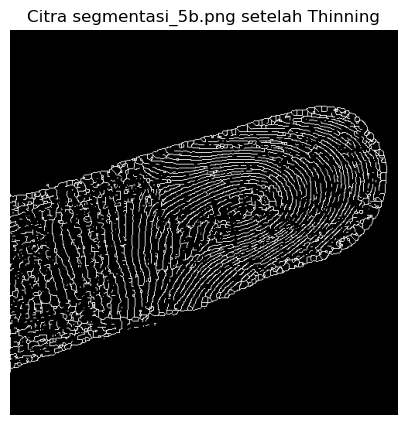

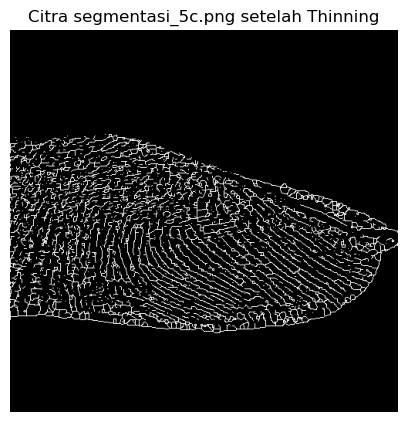

In [19]:
import cv2
import matplotlib.pyplot as plt
import os

# Fungsi untuk menampilkan citra
def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

# Fungsi untuk melakukan thinning citra biner
def thinning_image(binary_image):
    # Inisialisasi citra hasil thinning
    thinned_image = np.zeros(binary_image.shape, dtype=np.uint8)
    
    # Algoritma Zhang-Suen untuk thinning
    skeleton = cv2.ximgproc.thinning(binary_image)
    thinned_image[skeleton > 0] = 255
    
    return thinned_image

# Daftar folder dengan citra sidik jari
folder_names = ['hasil segmentasi']

# Loop melalui setiap folder
for folder in folder_names:
    print(f"Folder: {folder}")
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Binarisasi citra
            _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

            # Thinning citra biner
            thinned_image = thinning_image(binary_image)

            # Menampilkan citra setelah thinning
            show_image(f"Citra {filename} setelah Thinning", thinned_image)


Folder: hasil segmentasi


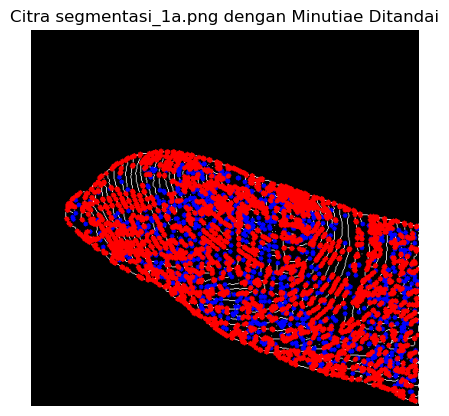

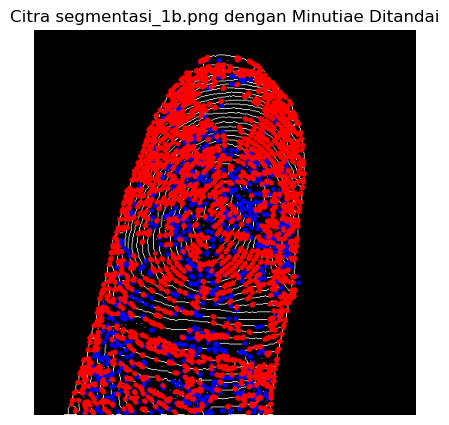

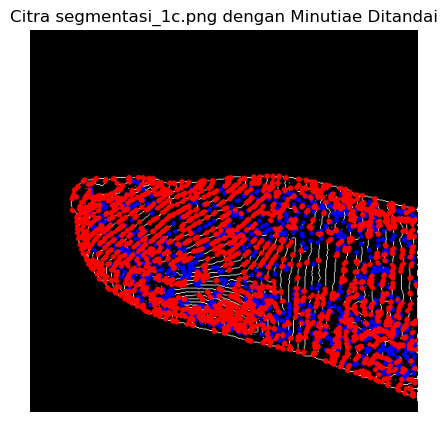

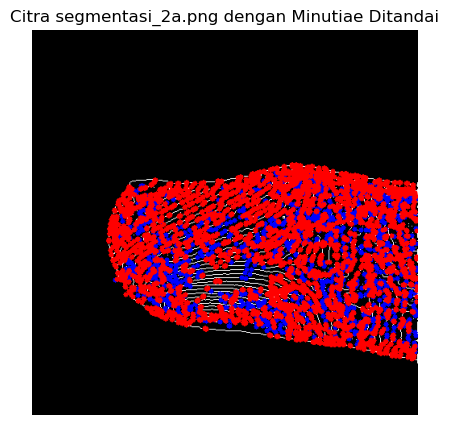

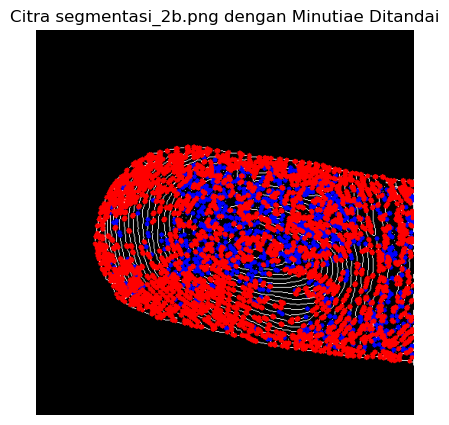

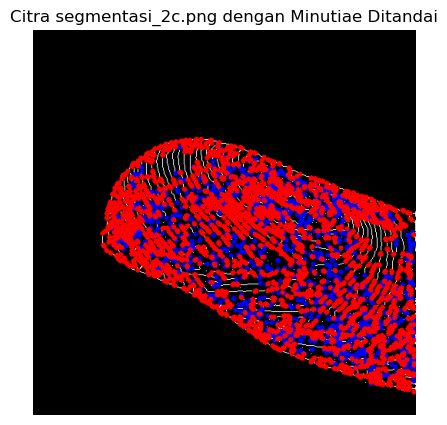

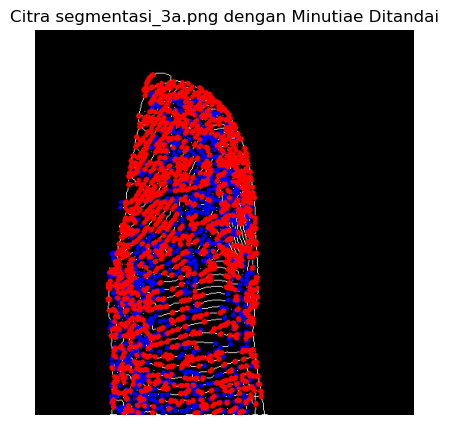

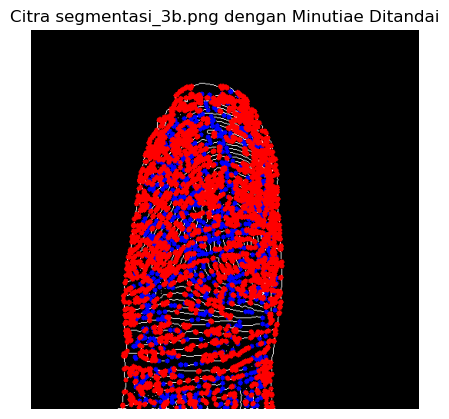

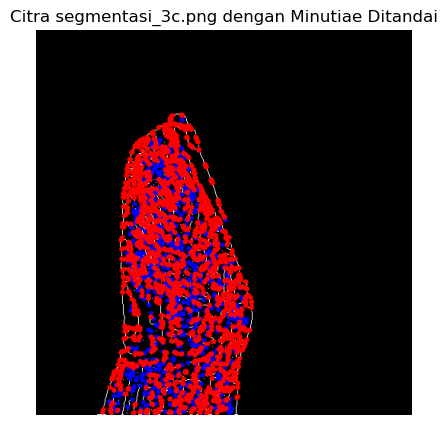

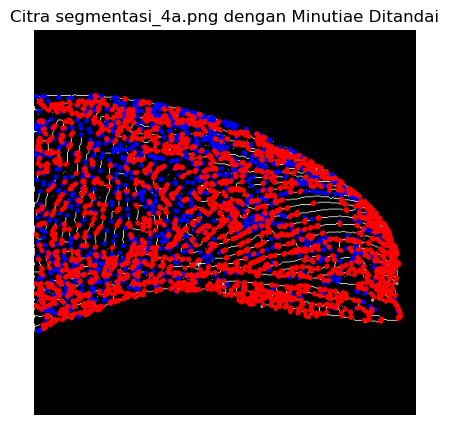

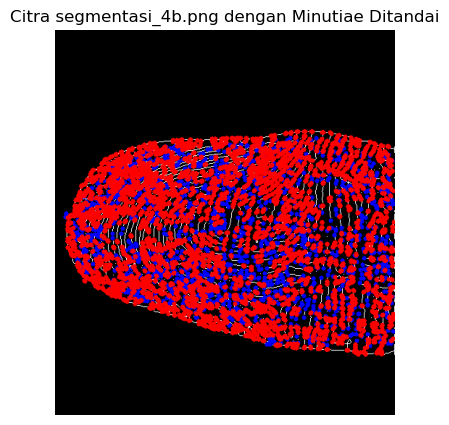

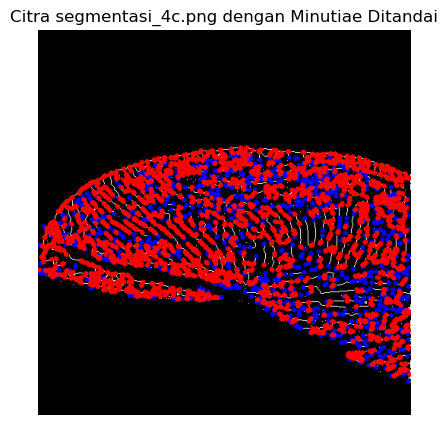

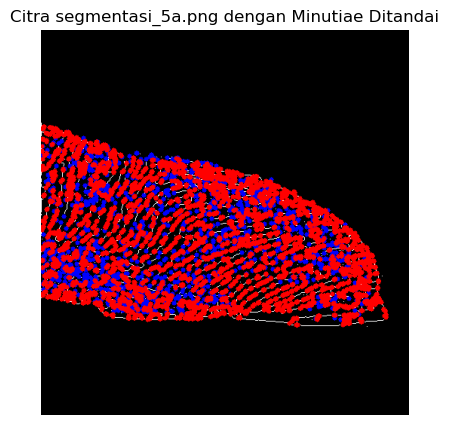

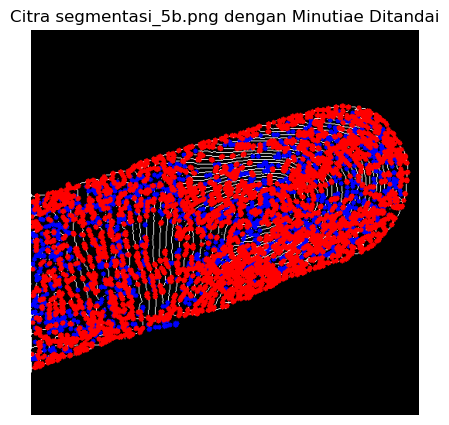

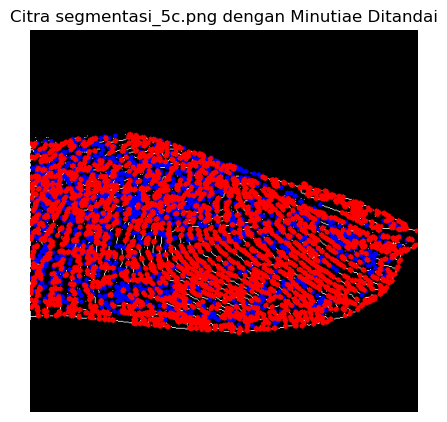

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Fungsi untuk menampilkan citra
def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

# Fungsi untuk mendeteksi titik akhir dan bifurkasi
def minutiae_extraction(thinned_image):
    minutiae_endings = []
    minutiae_bifurcations = []
    
    # Memeriksa setiap piksel dalam citra yang ditipiskan
    for i in range(1, thinned_image.shape[0] - 1):
        for j in range(1, thinned_image.shape[1] - 1):
            if thinned_image[i, j] == 255:  # Piksel putih (foreground)
                # Membuat jendela 3x3 di sekitar piksel
                window = thinned_image[i-1:i+2, j-1:j+2]
                # Menghitung jumlah tetangga berwarna putih (foreground)
                count = np.sum(window == 255)
                
                if count == 2:
                    minutiae_endings.append((i, j))
                elif count == 4:
                    minutiae_bifurcations.append((i, j))
    
    return minutiae_endings, minutiae_bifurcations

# Daftar folder dengan citra sidik jari
folder_names = ['hasil segmentasi']

# Loop melalui setiap folder
for folder in folder_names:
    print(f"Folder: {folder}")
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            image_path = os.path.join(folder, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            # Binarisasi citra
            _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

            # Thinning citra menggunakan Zhang-Suen thinning algorithm
            thinned_image = cv2.ximgproc.thinning(binary_image)

            # Ekstraksi minutiae
            minutiae_endings, minutiae_bifurcations = minutiae_extraction(thinned_image)

            # Menampilkan citra dengan minutiae ditandai
            image_with_minutiae = cv2.cvtColor(thinned_image, cv2.COLOR_GRAY2BGR)
            for ending in minutiae_endings:
                cv2.circle(image_with_minutiae, (ending[1], ending[0]), 3, (0, 0, 255), -1)
            for bifurcation in minutiae_bifurcations:
                cv2.circle(image_with_minutiae, (bifurcation[1], bifurcation[0]), 3, (255, 0, 0), -1)

            show_image(f"Citra {filename} dengan Minutiae Ditandai", image_with_minutiae, cmap_type='hsv')


In [1]:
pip install opencv-contrib-python

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

# Fungsi untuk menampilkan citra
def show_image(title, image, cmap_type='gray'):
    plt.figure(figsize=(5, 5))
    plt.title(title)
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

# Fungsi untuk menghitung histogram dari citra ridge
def compute_histogram(orientation):
    # Menghitung histogram menggunakan OpenCV
    hist = cv2.calcHist([orientation.astype(np.float32)], [0], None, [256], [0, 256])
    hist_normalized = hist / np.sum(hist)  # Normalisasi histogram
    
    return hist_normalized, hist

# Fungsi untuk thinning citra biner
def thinning_image(binary_image):
    # Inisialisasi citra hasil thinning
    thinned_image = np.zeros(binary_image.shape, dtype=np.uint8)
    
    # Algoritma Zhang-Suen untuk thinning
    skeleton = cv2.ximgproc.thinning(binary_image)
    thinned_image[skeleton > 0] = 255
    
    return thinned_image

# Fungsi untuk menghitung orientasi ridge
def compute_orientation(image, block_size):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    orientation = np.arctan2(gradient_y, gradient_x)
    orientation = np.rad2deg(orientation)
    orientation = (orientation + 180) % 180  # Normalisasi antara 0-180 derajat
    
    return orientation

# Daftar folder dengan citra sidik jari
folder_name = 'hasil segmentasi'  # Ubah sesuai dengan folder tempat Anda menyimpan citra

# Membuka file CSV untuk menulis fitur
with open('features.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["filename"] + [f"feature_{i}" for i in range(256)])  # Header CSV

    # Loop melalui setiap citra dalam folder
    for filename in os.listdir(folder_name):
        if filename.endswith(".png"):
            image_path = os.path.join(folder_name, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

            if image is None:
                print(f"Gagal membaca citra: {filename}")
                continue
            
            equalized_image = cv2.equalizeHist(image)
            _, binary_image = cv2.threshold(equalized_image, 127, 255, cv2.THRESH_BINARY)
            thinned_image = thinning_image(binary_image)
            orientation = compute_orientation(thinned_image, block_size=16)
            ridge_histogram_normalized, _ = compute_histogram(orientation)
            
            # Menulis fitur ke file CSV
            writer.writerow([filename] + ridge_histogram_normalized.flatten().tolist())


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load data dari file CSV
data = pd.read_csv('features.csv')

# Misalnya, jika label ada dalam kolom terakhir
X = data.iloc[:, 1:-1].values  # Fitur
y = data.iloc[:, -1].values  # Label

# Pembagian data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


In [7]:
pip install opencv-contrib-python

In [9]:
pip install --upgrade scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB 653.6 kB/s eta 0:00:20
    --------------------------------------- 0.2/12.8 MB 2.4 MB/s eta 0:00:06
    --------------------------------------- 0.2/12.8 MB 2.2 MB/s eta 0:00:06
    --------------------------------------- 0.3/12.8 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.3/12.8 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.3/12.8 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.4/12.8 MB 1.2 MB/s eta 0:00:11
   - -------------------------------------- 0.5/12.8 MB 1.2 MB/s eta 0:00:11
   -- ------------------------------------- 0.6/12.8 MB 1.4 MB/s eta 0:00:09
   -- ------------------------------------- 0.7/12.8 MB 1.3 MB/s eta 0:00:10
   -- ------------------------------------- 0.7/12.8 MB 1.3 MB/s eta 0:00:10
   -

In [13]:
import numpy as np
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Fungsi untuk menghitung histogram dari citra ridge
def compute_histogram(orientation):
    hist = cv2.calcHist([orientation.astype(np.float32)], [0], None, [256], [0, 256])
    hist_normalized = hist / np.sum(hist)
    return hist_normalized

# Fungsi untuk thinning citra biner
def thinning_image(binary_image):
    skeleton = cv2.ximgproc.thinning(binary_image)
    thinned_image = np.zeros(binary_image.shape, dtype=np.uint8)
    thinned_image[skeleton > 0] = 255
    return thinned_image

# Fungsi untuk menghitung orientasi ridge
def compute_orientation(image, block_size):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    orientation = np.arctan2(gradient_y, gradient_x)
    orientation = np.rad2deg(orientation)
    orientation = (orientation + 180) % 180
    return orientation

# Daftar label dan folder
folders = ["SidikJari1", "SidikJari2", "SidikJari3"]
featlist = ['RedMean', 'GreenMean', 'BlueMean', 'RedStd', 'GreenStd', 'BlueStd', 'OrientationHist', 'Label']
final = []

for folder in folders:
    print(folder)
    labell = folders.index(folder)
    INPUT_SCAN_FOLDER = "hasil segmentasi"
    
    image_folder_list = os.listdir(INPUT_SCAN_FOLDER)
    
    for i in range(len(image_folder_list)):
        # Pre-Processing Data dari RGB menjadi LAB 
        img = cv2.imread(INPUT_SCAN_FOLDER + image_folder_list[i])
        if img is None:
            print(f"Failed to read image: {INPUT_SCAN_FOLDER + image_folder_list[i]}")
            continue
        
        lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        
        # Segmentasi
        low = np.array([30])
        up = np.array([126])
        mask = cv2.inRange(lab[:, :, 1], low, up)
        img[mask > 0] = (255, 255, 255)

        # Ekstraksi Fitur
        red_channel = img[:, :, 2]
        green_channel = img[:, :, 1]
        blue_channel = img[:, :, 0]
        blue_channel[blue_channel == 255] = 0
        green_channel[green_channel == 255] = 0 
        red_channel[red_channel == 255] = 0
        
        red_mean = np.mean(red_channel)
        green_mean = np.mean(green_channel)
        blue_mean = np.mean(blue_channel)
        red_std = np.std(red_channel)
        green_std = np.std(green_channel)
        blue_std = np.std(blue_channel)
        
        gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
        thinned_image = thinning_image(binary_image)
        orientation = compute_orientation(thinned_image, block_size=16)
        ridge_histogram_normalized = compute_histogram(orientation)
        
        features = np.array([red_mean, green_mean, blue_mean, red_std, green_std, blue_std, ridge_histogram_normalized.flatten(), labell])
        final.append(features)
        
df = pd.DataFrame(final, columns=featlist)
filepath = "Training.csv"
df.to_csv(filepath, index=False)

SidikJari1
Failed to read image: hasil segmentasi.ipynb_checkpoints
Failed to read image: hasil segmentasisegmentasi_1a.png
Failed to read image: hasil segmentasisegmentasi_1b.png
Failed to read image: hasil segmentasisegmentasi_1c.png
Failed to read image: hasil segmentasisegmentasi_2a.png
Failed to read image: hasil segmentasisegmentasi_2b.png
Failed to read image: hasil segmentasisegmentasi_2c.png
Failed to read image: hasil segmentasisegmentasi_3a.png
Failed to read image: hasil segmentasisegmentasi_3b.png
Failed to read image: hasil segmentasisegmentasi_3c.png
Failed to read image: hasil segmentasisegmentasi_4a.png
Failed to read image: hasil segmentasisegmentasi_4b.png
Failed to read image: hasil segmentasisegmentasi_4c.png
Failed to read image: hasil segmentasisegmentasi_5a.png
Failed to read image: hasil segmentasisegmentasi_5b.png
Failed to read image: hasil segmentasisegmentasi_5c.png
SidikJari2
Failed to read image: hasil segmentasi.ipynb_checkpoints
Failed to read image: ha

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

def compute_lbp(image, radius=1, neighbors=8):
    """Calculates the Local Binary Pattern (LBP) for an image."""
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp_result = np.zeros_like(gray_image)

    for y in range(radius, gray_image.shape[0] - radius):
        for x in range(radius, gray_image.shape[1] - radius):
            center_pixel = gray_image[y, x]
            lbp_code = 0
            for i in range(neighbors):
                angle = 2 * np.pi * i / neighbors
                x_neighbor = int(x + radius * np.cos(angle))
                y_neighbor = int(y - radius * np.sin(angle))
                neighbor_pixel = gray_image[y_neighbor, x_neighbor]
                lbp_code |= (neighbor_pixel >= center_pixel) << i
            lbp_result[y, x] = lbp_code

    return lbp_result

# Path to the folder containing images
folder_path = 'sidikjari/processed'  # Replace with your actual folder path

# Initialize vectors for features and labels
all_features = []
labels = []

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)
        lbp_result = compute_lbp(image)

        # Calculate LBP histogram
        hist, _ = np.histogram(lbp_result.ravel(), bins=np.arange(0, 256))
        hist = hist.astype(float)
        hist /= hist.sum()

        # Append histogram and label
        all_features.append(hist)
        label = os.path.splitext(filename)[0]
        labels.append(label)

# Combine LBP histograms from all images
combined_features = np.vstack(all_features)

# Create DataFrame for features and label
featlist = [f'X{i}' for i in range(combined_features.shape[1])]
df = pd.DataFrame(combined_features, columns=featlist)
df['label'] = labels

# Remove columns containing only zero values (using NumPy array)
df_array = df.to_numpy()
non_zero_cols = np.any(df_array != 0, axis=0)
df_filtered = df[df.columns[non_zero_cols]]

# Separate features (X_train) and labels (y_train)
X_train = df_filtered.drop('label', axis=1).to_numpy()
y_train = df_filtered['label'].to_numpy()

# Normalize X_train using MinMaxScaler
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)

# Split into training and validation sets
X_train_norm, X_val_norm, y_train_norm, y_val_norm = train_test_split(X_train_normalized, y_train, test_size=0.2, random_state=42)

print(f"Shape of X_train_normalized: {X_train_normalized.shape}")
print(f"Shape of y_train_norm: {y_train_norm.shape}")
print(f"Shape of X_val_norm: {X_val_norm.shape}")
print(f"Shape of y_val_norm: {y_val_norm.shape}")


Shape of X_train_normalized: (15, 32)
Shape of y_train_norm: (12,)
Shape of X_val_norm: (3, 32)
Shape of y_val_norm: (3,)
